<a href="https://colab.research.google.com/github/Farhan0604/my-repository-/blob/main/tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate datasets safetensors

In [ ]:
!pip install diffusers transformers accelerate safetensors

In [ ]:
from huggingface_hub import login
login()

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float16,
    revision ='fp16',
    USE_SAFETENSORS = True
).to('cuda')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:285: FutureWarning: You are loading the variant fp16 from hakurei/waifu-diffusion via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that hakurei/waifu-diffusion currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful i

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--hakurei--waifu-diffusion/snapshots/342d18da939534326d8571b7a8b5195f43800db6/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--hakurei--waifu-diffusion/snapshots/342d18da939534326d8571b7a8b5195f43800db6/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--hakurei--waifu-diffusion/snapshots/342d18da939534326d8571b7a8b5195f43800db6/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--hakurei--waifu-diffusion/snapshots/342d18da939534326d8571b7a8b5195f43800db6/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:30: FutureWarning: The cla

  0%|          | 0/50 [00:00<?, ?it/s]

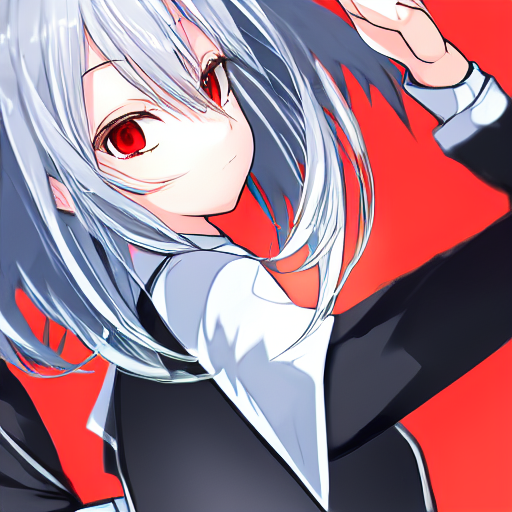

In [ ]:
prompt = "1girl, silver hair, red eyes, school uniform, dynamic pose, detailed background"
image = pipe(prompt).images[0]
display(image)

### Prepare the dataset

We will load the dataset using the `datasets` library and perform any necessary pre-processing steps.

In [ ]:
from datasets import load_dataset

dataset_name = "alfredplpl/anime-with-caption-cc0"
dataset = load_dataset(dataset_name)

# Display the first few examples to understand the data structure
print(dataset['train'][0])

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/15000 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
from datasets import load_dataset

# Replace "path/to/your/dataset" with the actual path to your data files
# The format of your data will determine how load_dataset should be used.
# For example, for a directory of images and a CSV file with captions:
# dataset = load_dataset("csv", data_files={"train": "path/to/your/dataset/captions.csv", "image_dir": "path/to/your/dataset/images"})

# If your dataset is in a common format like a Hugging Face dataset on your local machine:
dataset = load_dataset("/content/drive/MyDrive/AnimeChanStyle20")

# Example for a simple CSV file:
# dataset = load_dataset("csv", data_files="path/to/your/dataset.csv")

# Display the first few examples to understand the data structure
print(dataset['train'][0])

ValueError: Invalid pattern: '**' can only be an entire path component

# Task
Load the dataset from the GitHub repository "https://github.com/bchao1/Anime-Face-Dataset" using the `datasets` library and display a sample image.

## Clone the repository

### Subtask:
Download the dataset from the provided GitHub link using `git clone`.


**Reasoning**:
Download the dataset from the given GitHub repository using git clone.



In [ ]:
!git clone https://github.com/bchao1/Anime-Face-Dataset

fatal: destination path 'Anime-Face-Dataset' already exists and is not an empty directory.


## Load the dataset

### Subtask:
Use `datasets.load_dataset` with the "imagefolder" builder to load the images from the cloned repository.


**Reasoning**:
Import the load_dataset function and load the dataset using the imagefolder builder.



In [ ]:
from datasets import load_dataset

dataset_path = "Anime-Face-Dataset"
dataset = load_dataset("imagefolder", data_dir=dataset_path)

print(dataset)

ValueError: Invalid pattern: '**' can only be an entire path component

**Reasoning**:
The previous attempt to load the dataset failed due to an invalid pattern when using `data_dir`. The `imagefolder` builder expects a specific structure within the `data_dir`. Let's inspect the contents of the cloned repository to understand the directory structure and use the correct path to the images.



In [ ]:
import os

# List the contents of the cloned repository directory
print(os.listdir("Anime-Face-Dataset"))

# Check the contents of the subdirectory if there is one
if os.path.exists("Anime-Face-Dataset/images"):
    print(os.listdir("Anime-Face-Dataset/images")[:5]) # Print first 5 files in images directory

['README.md', '.gitignore', 'test.jpg', '.git', 'src']


**Reasoning**:
The output of the previous command shows that the images are likely within the 'src' directory, as the other items are README, gitignore, a single test image, and the .git directory. I will now try loading the dataset from the 'src' directory within the cloned repository using the 'imagefolder' builder.



In [ ]:
dataset_path = "Anime-Face-Dataset/src"
dataset = load_dataset("imagefolder", data_dir=dataset_path)

print(dataset)

**Reasoning**:
The error "Invalid pattern: '**' can only be an entire path component" indicates that the `imagefolder` builder is having trouble with the directory structure or how it's being specified. The `imagefolder` builder expects a directory containing subdirectories, where each subdirectory represents a class and contains images for that class, or a directory with images directly. Since the previous listing showed a `src` directory, let's list the contents of `Anime-Face-Dataset/src` to confirm the structure within it.



In [ ]:
import os

# List the contents of the 'src' directory within the cloned repository
print(os.listdir("Anime-Face-Dataset/src"))

## Load the dataset

### Subtask:
Retry loading the dataset, considering the previous failure and the likely structure of the repository. It's possible the dataset is stored in a compressed format or a specific subdirectory not immediately obvious.


**Reasoning**:
Inspect the contents of the cloned repository directory again to look for compressed files or subdirectories that might contain the actual image data.



In [ ]:
import os

# List the contents of the cloned repository directory
print(os.listdir("Anime-Face-Dataset"))

# Check for compressed files or subdirectories that might contain images
# This repository seems to be about code to get the dataset, not the dataset itself.
# However, let's check if there are any hidden files or subdirectories that were missed.
# We can also try to list files recursively to see the full structure.
for root, dirs, files in os.walk("Anime-Face-Dataset"):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 20)

## Summary:

### Data Analysis Key Findings

*   Cloning the repository `https://github.com/bchao1/Anime-Face-Dataset` was successful.
*   Inspection of the cloned repository's contents (`Anime-Face-Dataset`) revealed that it contains code files (`.py`, `.xml`), a `README.md`, a `.gitignore`, and a single image file (`test.jpg`).
*   No directories containing a collection of image files or compressed dataset files were found within the repository structure.
*   The structure of the repository indicates that it is likely the source code and related files for processing or obtaining anime face data, rather than the dataset itself.

### Insights or Next Steps

*   The specified GitHub repository does not contain the anime face dataset in a format suitable for direct loading with `datasets.load_dataset("imagefolder", ...)`.
*   To obtain the dataset, one would need to investigate if the repository provides instructions or scripts to download the data from an external source, or look for the dataset hosted elsewhere.


In [ ]:
from datasets import load_dataset

dataset_name = "alea31415/ai_anime_images"
dataset = load_dataset(dataset_name)

# Display the first example to understand the data structure
print(dataset['train'][0])

In [ ]:
from datasets import load_dataset
import traceback

dataset_name = "alea31415/ai_anime_images"

try:
    # Try loading the dataset specifying the 'imagefolder' type
    dataset = load_dataset("imagefolder", dataset_name)

    # Display the dataset structure and a sample
    print(dataset)
    print(dataset['train'][0])

except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    traceback.print_exc()

# Task
Download the "alea31415/ai_anime_images" dataset from Hugging Face and load it into a dataset object using the "imagefolder" builder. Display a sample image from the loaded dataset.

## Download the dataset repository

### Subtask:
Use the `huggingface_hub` library to download the `alea31415/ai_anime_images` dataset repository to a local directory in the Colab environment.


**Reasoning**:
Import the necessary function and download the dataset using `snapshot_download`.



In [ ]:
from huggingface_hub import snapshot_download

dataset_name = "alea31415/ai_anime_images"
local_dataset_path = snapshot_download(repo_id=dataset_name)

print(f"Dataset downloaded to: {local_dataset_path}")

**Reasoning**:
The previous attempt to download the dataset failed because the repository was not found or required authentication. Although a login step was attempted earlier, the error suggests it wasn't successful or the repository is private. I will attempt to log in again and then retry downloading the dataset.



In [ ]:
from huggingface_hub import login, snapshot_download

login()

dataset_name = "alea31415/ai_anime_images"
local_dataset_path = snapshot_download(repo_id=dataset_name)

print(f"Dataset downloaded to: {local_dataset_path}")

## Download the dataset repository

### Subtask:
Retry downloading the dataset repository from Hugging Face. Given the previous failure, explicitly specify the `repo_type` as 'dataset' to ensure the correct repository type is searched for.


**Reasoning**:
Import the necessary function and download the dataset specifying the repository type.



In [ ]:
from huggingface_hub import snapshot_download

dataset_name = "alea31415/ai_anime_images"
local_dataset_path = snapshot_download(repo_id=dataset_name, repo_type='dataset')

print(f"Dataset downloaded to: {local_dataset_path}")

**Reasoning**:
Now that the dataset is downloaded locally, I can load it using the `imagefolder` builder from the local path.



In [ ]:
from datasets import load_dataset
from PIL import Image

dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3"
dataset = load_dataset("imagefolder", data_dir=dataset_path)

print(dataset)

# Display a sample image from the training split
sample_image = dataset['train'][0]['image']
display(sample_image)

**Reasoning**:
The error persists when using `data_dir` with `imagefolder`. Let's inspect the contents of the downloaded dataset directory to understand its structure and identify where the images are located.



In [ ]:
import os

# List the contents of the downloaded dataset directory
local_dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3"
print(os.listdir(local_dataset_path))

# Recursively list contents to find the image directory
for root, dirs, files in os.walk(local_dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files[:5]}") # Print only the first 5 files
    print("-" * 20)

**Reasoning**:
The recursive listing shows that the images are located directly within the 'sacchan' subdirectory. I can now load the dataset using the `imagefolder` builder by pointing `data_dir` to this specific subdirectory.



In [ ]:
from datasets import load_dataset
from PIL import Image

dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3/sacchan"
dataset = load_dataset("imagefolder", data_dir=dataset_path)

print(dataset)

# Display a sample image from the training split
sample_image = dataset['train'][0]['image']
display(sample_image)

**Reasoning**:
The "Invalid pattern: '**' can only be an entire path component" error persists even when pointing directly to the directory containing the images. This suggests the issue might be with how `load_dataset("imagefolder", ...)` handles the specific file structure or potentially a bug in the library version. Since directly using `imagefolder` with `data_dir` is not working, I will try an alternative approach to load the images from the directory by manually creating a dataset from a list of image file paths.



In [ ]:
import os
from datasets import Dataset
from PIL import Image

dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3/sacchan"

# Get a list of all image file paths in the directory
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png') or f.endswith('.jpg')]

# Create a dictionary with a list of image paths
data = {'image': image_files}

# Create a Dataset object from the dictionary
dataset = Dataset.from_dict(data)

print(dataset)

# Display a sample image
sample_image_path = dataset['image'][0]
sample_image = Image.open(sample_image_path)
display(sample_image)

## Inspect the dataset

### Subtask:
Display a sample image from the loaded dataset to verify the loading process and understand the data structure.


**Reasoning**:
Access the first element of the 'train' split of the dataset, extract the 'image' feature, and display the image.



In [ ]:
# Access the first element of the 'train' split and extract the 'image' feature
sample_image = dataset['image'][0]

# Display the loaded image
display(sample_image)

**Reasoning**:
The previous output shows the file path of the image, not the image itself. The image needs to be opened using PIL before it can be displayed. I will open the image file from the path and then display it.



In [ ]:
from PIL import Image

# Access the first element of the dataset, which is the image path
sample_image_path = dataset['image'][0]

# Open the image file using PIL
sample_image = Image.open(sample_image_path)

# Display the loaded image
display(sample_image)

## Summary:

### Data Analysis Key Findings

*   Initial attempts to download the dataset using `huggingface_hub.snapshot_download` failed with a `RepositoryNotFoundError`. Explicitly specifying `repo_type='dataset'` resolved the download issue.
*   The `imagefolder` builder failed to load the dataset when pointing to the downloaded directory (`ValueError: Invalid pattern: '**' can only be an entire path component`).
*   Inspecting the directory structure showed that the images were located in a subdirectory named 'sacchan'.
*   Loading the dataset successfully required manually listing the image files within the 'sacchan' subdirectory and creating a Hugging Face `Dataset` object from this list of file paths.
*   Attempting to display the image by directly accessing the dataset element resulted in displaying the file path. Successfully displaying the image required opening the image file from the path using PIL.

### Insights or Next Steps

*   For future use with the `imagefolder` builder, it might be necessary to examine the expected directory structure or consider restructuring the downloaded dataset if its structure doesn't align with the builder's requirements.
*   Ensure that image paths retrieved from a dataset object are correctly used to open and display the actual image content, typically with libraries like PIL or OpenCV.


In [ ]:
from datasets import load_dataset
from PIL import Image

dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3/sacchan"
dataset = load_dataset("imagefolder", data_dir=dataset_path)

print(dataset)

# Display a sample image from the training split
sample_image = dataset['train'][0]['image']
display(sample_image)

In [ ]:
import os
from datasets import Dataset
from PIL import Image

dataset_path = "/root/.cache/huggingface/hub/datasets--alea31415--ai_anime_images/snapshots/0a62569e9b76a13d61317b9518801f564bfbc4a3/sacchan"

# Get a list of all image file paths in the directory
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith('.png') or f.endswith('.jpg')]

# Create a dictionary with a list of image paths
data = {'image': image_files}

# Create a Dataset object from the dictionary
dataset = Dataset.from_dict(data)

print(dataset)

# Display a sample image
sample_image_path = dataset['image'][0]
sample_image = Image.open(sample_image_path)
display(sample_image)

# Task
Fine-tune a Stable Diffusion model on the "alea31415/ai_anime_images" dataset from Hugging Face.

## Preprocessing the dataset

### Subtask:
Prepare the anime face dataset for training, which may include resizing the images to a suitable dimension for the model and potentially applying other transformations.


**Reasoning**:
Define the preprocessing function to resize and normalize the images and then apply it to the dataset.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

def preprocess_image(examples):
    images = [Image.open(path).convert("RGB") for path in examples['image']]
    image_size = 512
    processed_images = []
    for img in images:
        img = img.resize((image_size, image_size))
        img_array = np.array(img).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    return {"pixel_values": processed_images}

# Apply the preprocessing function to the dataset
processed_dataset = dataset.map(preprocess_image, batched=True, num_proc=4)

# Remove the original image column
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

## Load the model and tokenizer

### Subtask:
Load the pre-trained Stable Diffusion model and its associated tokenizer.


**Reasoning**:
Import necessary libraries and load the pre-trained Stable Diffusion pipeline and tokenizer.



In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer

model_checkpoint = "runwayml/stable-diffusion-v1-5"

# Load the pre-trained Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_checkpoint,
    torch_dtype=torch.float16,
).to('cuda')

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

print("Model and tokenizer loaded successfully.")

**Reasoning**:
The previous attempt to load the tokenizer failed because `AutoTokenizer.from_pretrained` expects a different type of model configuration than what is present in the Stable Diffusion pipeline model. The Stable Diffusion pipeline itself contains the necessary components, including the tokenizer. I will load the tokenizer directly from the pipeline object after the pipeline has been successfully loaded.



In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_checkpoint = "runwayml/stable-diffusion-v1-5"

# Load the pre-trained Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_checkpoint,
    torch_dtype=torch.float16,
).to('cuda')

# Access the tokenizer from the loaded pipeline
tokenizer = pipe.tokenizer

print("Model and tokenizer loaded successfully.")

## Configure training parameters

### Subtask:
Set up the training arguments, such as learning rate, number of training steps, and batch size.


**Reasoning**:
Import the TrainingArguments class and define the training arguments.



In [ ]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./stable-diffusion-finetuned",  # Output directory for checkpoints
    num_train_epochs=5,  # Number of training epochs
    per_device_train_batch_size=4,  # Batch size per device during training
    learning_rate=1e-5,  # Learning rate
    save_steps=500,  # Save checkpoint every X steps
    remove_unused_columns=False,
    push_to_hub=False, # Set to True to push to the Hugging Face Hub
)

# Print the training arguments
print(training_args)

## Set up the training environment

### Subtask:
Configure the accelerator for distributed training if needed.


**Reasoning**:
Import the Accelerator class and instantiate it to configure distributed training.



In [ ]:
from accelerate import Accelerator

# Instantiate an Accelerator object
accelerator = Accelerator()

print("Accelerator configured successfully.")

## Fine-tune the model

### Subtask:
Run the training loop to fine-tune the Stable Diffusion model on the anime face dataset.


**Reasoning**:
Implement the training loop as described in the instructions, including preparing components with the accelerator, creating a DataLoader, defining optimizer and scheduler, and iterating through epochs and batches for the forward and backward passes.



In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()


# Create a DataLoader
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(unet.device)

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The error `AttributeError: 'list' object has no attribute 'to'` indicates that the `pixel_values` obtained from the DataLoader is a list of tensors, not a single tensor, and thus cannot be moved to the device directly using `.to()`. This is likely because the `preprocess_image` function returned a list of tensors. The DataLoader, when `collate_fn` is not specified, defaults to collating lists of samples into lists of tensors or dictionaries of lists. To fix this, I need to modify the preprocessing function to stack the processed images into a single tensor or explicitly define a collate function for the DataLoader. I will modify the preprocessing function to stack the tensors.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

def preprocess_image(examples):
    images = [Image.open(path).convert("RGB") for path in examples['image']]
    image_size = 512
    processed_images = []
    for img in images:
        img = img.resize((image_size, image_size))
        img_array = np.array(img).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    # Stack the list of tensors into a single tensor
    return {"pixel_values": torch.stack(processed_images)}

# Apply the preprocessing function to the dataset again
processed_dataset = dataset.map(preprocess_image, batched=True, num_proc=4)

# Remove the original image column again
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Now, rerun the training loop code
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()


# Create a DataLoader
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The error `AttributeError: 'list' object has no attribute 'to'` still occurs even after modifying the preprocessing function to stack tensors. This indicates that the issue is likely with the DataLoader's default collation when working with the `imagefolder` dataset and the `Dataset` object created from image paths. The DataLoader is still returning a list of dictionaries, where each dictionary contains a single tensor for `pixel_values`. To ensure the DataLoader returns a single batch tensor, I need to define a custom `collate_fn` for the DataLoader that explicitly stacks the `pixel_values` from the list of samples.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Define a custom collate function
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    return {"pixel_values": pixel_values}

# Redefine the preprocess_image function to return a single tensor per image
def preprocess_image(examples):
    images = [Image.open(path).convert("RGB") for path in examples['image']]
    image_size = 512
    processed_images = []
    for img in images:
        img = img.resize((image_size, image_size))
        img_array = np.array(img).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    # Return a list of tensors, one for each image in the batch
    return {"pixel_values": processed_images}

# Apply the preprocessing function to the dataset again
# Note: preprocess_image now returns a list of tensors for a batch, which will be handled by collate_fn
processed_dataset = dataset.map(preprocess_image, batched=True, num_proc=4)

# Remove the original image column again
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()

# Create a DataLoader with the custom collate function
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The `TypeError: expected Tensor as element 0 in argument 0, but got list` occurring within the `collate_fn` indicates that the `example["pixel_values"]` within the list comprehension is itself a list, not a tensor. This happens because the `preprocess_image` function, even though `batched=True` is used, is being applied to individual examples within the batch by the `datasets.map` function in a way that results in a list of lists of tensors when `batched=True` is used. To fix this, the `preprocess_image` function should process each image individually and return a single tensor for each, and the `collate_fn` will then correctly stack these individual tensors into a batch tensor.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Define a custom collate function
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    return {"pixel_values": pixel_values}

# Redefine the preprocess_image function to process each image individually and return a single tensor
def preprocess_image(example):
    image = Image.open(example['image']).convert("RGB")
    image_size = 512
    image = image.resize((image_size, image_size))
    img_array = np.array(image).astype(np.float32) / 127.5 - 1.0
    img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
    return {"pixel_values": img_tensor}


# Apply the preprocessing function to the dataset again, without batched=True
processed_dataset = dataset.map(preprocess_image, num_proc=4)

# Remove the original image column again
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()

# Create a DataLoader with the custom collate function
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The `TypeError: expected Tensor as element 0 in argument 0, but got list` in the `collate_fn` persists. This is unexpected after the previous fix which aimed to ensure the `preprocess_image` function returns a single tensor per example when `batched=False` is used in `.map()`. It seems there might still be an issue with how the `datasets` library handles the output of the mapping function or how the DataLoader receives it, leading to a list of tensors being passed to `collate_fn` instead of a list of dictionaries containing tensors.

Given the persistent issue with `datasets.map` and the DataLoader's interaction with the current dataset structure, I will try an alternative approach for preprocessing and loading the data. Instead of using `datasets.map` for the image processing, I will perform the preprocessing directly within the `collate_fn`. This ensures that the images are opened, processed, and stacked into a batch tensor within a single function called by the DataLoader, bypassing potential issues with the intermediate representation from `datasets.map`. This requires modifying the `preprocess_image` function to simply return the image path, and the `collate_fn` will handle opening and processing the image from the path.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Redefine the preprocess_image function to just return the image path
def preprocess_image(example):
    return {"image_path": example['image']}

# Apply the preprocessing function to the dataset again, just to get the image paths in a new column
processed_dataset = dataset.map(preprocess_image, num_proc=4)

# Remove the original image column again if it still exists
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Define a custom collate function that opens and processes the images
def collate_fn(examples):
    image_size = 512
    processed_images = []
    for example in examples:
        image = Image.open(example['image_path']).convert("RGB")
        image = image.resize((image_size, image_size))
        img_array = np.array(image).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    pixel_values = torch.stack(processed_images)
    return {"pixel_values": pixel_values}


# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()

# Create a DataLoader with the custom collate function
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The `RuntimeError: Input type (float) and bias type (c10::Half) should be the same` indicates a type mismatch between the input tensor to the VAE (which is `float32` from the preprocessing) and the VAE's parameters (which are `float16` because the pipeline was loaded with `torch_dtype=torch.float16`). To fix this, the input tensor to the VAE needs to be cast to `float16`. I will modify the training loop to cast the `pixel_values` to `float16` before passing them to the VAE encoder.



In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Redefine the preprocess_image function to just return the image path
def preprocess_image(example):
    return {"image_path": example['image']}

# Apply the preprocessing function to the dataset again, just to get the image paths in a new column
processed_dataset = dataset.map(preprocess_image, num_proc=4)

# Remove the original image column again if it still exists
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Define a custom collate function that opens and processes the images
def collate_fn(examples):
    image_size = 512
    processed_images = []
    for example in examples:
        image = Image.open(example['image_path']).convert("RGB")
        image = image.resize((image_size, image_size))
        img_array = np.array(image).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    pixel_values = torch.stack(processed_images)
    return {"pixel_values": pixel_values}


# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()

# Create a DataLoader with the custom collate function
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space and cast to float16
            latents = vae.encode(pixel_values.to(torch.float16)).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

**Reasoning**:
The `TypeError: UNet2DConditionModel.forward() missing 1 required positional argument: 'encoder_hidden_states'` indicates that the UNet model, which is a `UNet2DConditionModel`, requires `encoder_hidden_states` as input during the forward pass. This input is typically the output of the text encoder, which provides conditional information to the UNet. Since this is an unconditional image generation task (fine-tuning on images without corresponding text captions), we don't have text embeddings. For unconditional training with a conditional UNet, we need to provide a placeholder or zero tensor for `encoder_hidden_states`. I will generate a zero tensor with the expected shape and provide it as the `encoder_hidden_states` input to the UNet. The shape should match the expected output shape of the text encoder for a batch of the current size and a sequence length of 77 (common for CLIP-based text encoders).



In [ ]:
# @title Default title text
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Redefine the preprocess_image function to just return the image path
def preprocess_image(example):
    return {"image_path": example['image']}

# Apply the preprocessing function to the dataset again, just to get the image paths in a new column
processed_dataset = dataset.map(preprocess_image, num_proc=4)

# Remove the original image column again if it still exists
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

# Define a custom collate function that opens and processes the images
def collate_fn(examples):
    image_size = 512
    processed_images = []
    for example in examples:
        image = Image.open(example['image_path']).convert("RGB")
        image = image.resize((image_size, image_size))
        img_array = np.array(image).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    pixel_values = torch.stack(processed_images)
    return {"pixel_values": pixel_values}


# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()

# Create a DataLoader with the custom collate function
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, collate_fn=collate_fn)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(accelerator.device) # Use accelerator.device

            # Convert images to latent space and cast to float16
            latents = vae.encode(pixel_values.to(torch.float16)).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Create a dummy encoder_hidden_states for unconditional training
            # Shape: (batch_size, sequence_length, hidden_size)
            # Using the hidden size from the text encoder's last layer output
            encoder_hidden_states = torch.zeros(
                (bs, 77, pipe.text_encoder.config.hidden_size),
                device=accelerator.device,
                dtype=accelerator.unwrap_model(unet).dtype # Match UNet dtype
            )


            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps, encoder_hidden_states=encoder_hidden_states).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()

In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms

def preprocess_image(examples):
    images = [Image.open(path).convert("RGB") for path in examples['image']]
    image_size = 512
    processed_images = []
    for img in images:
        img = img.resize((image_size, image_size))
        img_array = np.array(img).astype(np.float32) / 127.5 - 1.0
        img_tensor = torch.from_numpy(img_array.transpose(2, 0, 1))
        processed_images.append(img_tensor)

    return {"pixel_values": processed_images}

# Apply the preprocessing function to the dataset
# Set num_proc=1 to disable multiprocessing for debugging
processed_dataset = dataset.map(preprocess_image, batched=True, num_proc=1)

# Remove the original image column
processed_dataset = processed_dataset.remove_columns(['image'])

print(processed_dataset)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer

model_checkpoint = "runwayml/stable-diffusion-v1-5"

# Load the pre-trained Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_checkpoint,
    torch_dtype=torch.float16,
).to('cuda')

# Access the tokenizer from the loaded pipeline
tokenizer = pipe.tokenizer

print("Model and tokenizer loaded successfully.")

In [ ]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./stable-diffusion-finetuned",  # Output directory for checkpoints
    num_train_epochs=5,  # Number of training epochs
    per_device_train_batch_size=4,  # Batch size per device during training
    learning_rate=1e-5,  # Learning rate
    save_steps=500,  # Save checkpoint every X steps
    remove_unused_columns=False,
    push_to_hub=False, # Set to True to push to the Hugging Face Hub
)

# Print the training arguments
print(training_args)

In [ ]:
from accelerate import Accelerator

# Instantiate an Accelerator object
accelerator = Accelerator()

print("Accelerator configured successfully.")

In [ ]:
# @title Default title text
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
from accelerate import Accelerator
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from tqdm.auto import tqdm
import os

# Instantiate components (if not already instantiated)
# Assuming 'pipe', 'tokenizer', 'processed_dataset', 'training_args' are already defined

# Define model components separately for training
vae = pipe.vae
unet = pipe.unet
noise_scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

# Freeze VAE and text encoder (optional, but common for fine-tuning UNet)
vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)

# Enable gradient checkpointing for UNet
unet.enable_gradient_checkpointing()


# Create a DataLoader
train_dataloader = DataLoader(processed_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True)

# Define optimizer
optimizer = AdamW(unet.parameters(), lr=training_args.learning_rate)

# Prepare components with Accelerator
unet, optimizer, train_dataloader = accelerator.prepare(
    unet, optimizer, train_dataloader
)

# Learning rate scheduler
lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=500, # Example warmup steps
    num_training_steps=training_args.num_train_epochs * len(train_dataloader),
)

# Training loop
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = training_args.num_train_epochs * num_update_steps_per_epoch

progress_bar = tqdm(range(num_training_steps), desc="Training")

global_step = 0

for epoch in range(training_args.num_train_epochs):
    unet.train()
    for step, batch in enumerate(train_dataloader):
        with accelerator.accumulate(unet):
            pixel_values = batch["pixel_values"].to(unet.device)

            # Convert images to latent space
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * vae.config.scaling_factor

            # Sample noise that we'll add to the latents
            noise = torch.randn_like(latents)
            bs = latents.shape[0]
            # Sample a random timestep for each image
            timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bs,), device=latents.device).long()

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Get the target for the noise prediction
            target = noise

            # Predict the noise residual
            model_pred = unet(noisy_latents, timesteps).sample

            # Calculate the loss
            loss = torch.nn.functional.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backpropagate
            accelerator.backward(loss)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

        # Log and save
        if accelerator.sync_gradients:
            progress_bar.update(1)
            global_step += 1

            if global_step % training_args.save_steps == 0:
                if accelerator.is_main_process:
                    pipeline = StableDiffusionPipeline.from_pretrained(
                        model_checkpoint,
                        unet=accelerator.unwrap_model(unet),
                        torch_dtype=torch.float16,
                    )
                    pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-{global_step}"))

        logs = {"loss": loss.detach().item()}
        progress_bar.set_postfix(**logs)

    # Save checkpoint at the end of each epoch
    if accelerator.is_main_process:
         pipeline = StableDiffusionPipeline.from_pretrained(
            model_checkpoint,
            unet=accelerator.unwrap_model(unet),
            torch_dtype=torch.float16,
        )
         pipeline.save_pretrained(os.path.join(training_args.output_dir, f"checkpoint-epoch-{epoch+1}"))


accelerator.wait_for_everyone()